In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialize MLflow
import mlflow

# Uncomment the following line to log a a stand-alone server.
#mlflow.set_tracking_uri(uri="http://localhost:5000")

mlflow.set_experiment("Wind Chill Example")

2026/01/01 19:55:22 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/01 19:55:22 INFO mlflow.store.db.utils: Updating database tables
2026/01/01 19:55:22 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/01 19:55:22 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/01 19:55:22 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/01 19:55:22 INFO alembic.runtime.migration: Will assume non-transactional DDL.


<Experiment: artifact_location='/Users/rpotthas/all/e-ai_ml2/course/code/code12/mlruns/4', creation_time=1767288861314, experiment_id='4', last_update_time=1767288861314, lifecycle_stage='active', name='Wind Chill Example', tags={'mlflow.experimentKind': 'custom_model_development'}>

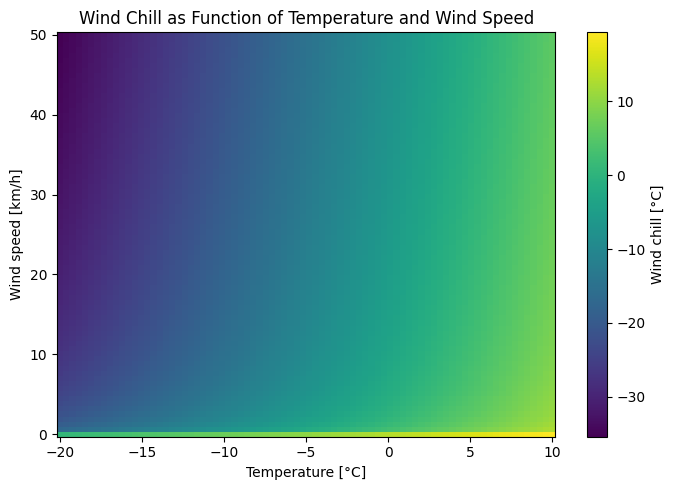

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Generate a structured grid for visualization
# ------------------------------------------------------------
tt = np.linspace(-20, 10, 80)    # temperature [°C]
ff = np.linspace(0, 50, 80)      # wind speed [km/h]
TT, FF = np.meshgrid(tt, ff)

# Wind chill formula
WC = (
    13.12
    + 0.6215 * TT
    - 11.37 * (FF ** 0.16)
    + 0.3965 * TT * (FF ** 0.16)
)

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
plt.figure(figsize=(7, 5))
pcm = plt.pcolormesh(TT, FF, WC, shading="auto")
plt.colorbar(pcm, label="Wind chill [°C]")

plt.xlabel("Temperature [°C]")
plt.ylabel("Wind speed [km/h]")
plt.title("Wind Chill as Function of Temperature and Wind Speed")

plt.tight_layout()
plt.savefig("windchill_surface.png", dpi=150)
plt.show()

In [4]:
#######
# Generate data
n_samples = 500

tt = np.random.uniform(-20, 10, n_samples)  # Temperature in Celsius
ff = np.random.uniform(0, 50, n_samples)  # Wind speed in km/h

# Wind Chill Formula
wc = 13.12 + 0.6215 * tt - 11.37 * (ff ** 0.16) + 0.3965 * tt * (ff ** 0.16)

# Convert to PyTorch tensors
x_train = torch.tensor(np.column_stack((tt, ff)), dtype=torch.float32)
y_train = torch.tensor(wc, dtype=torch.float32).view(-1, 1)


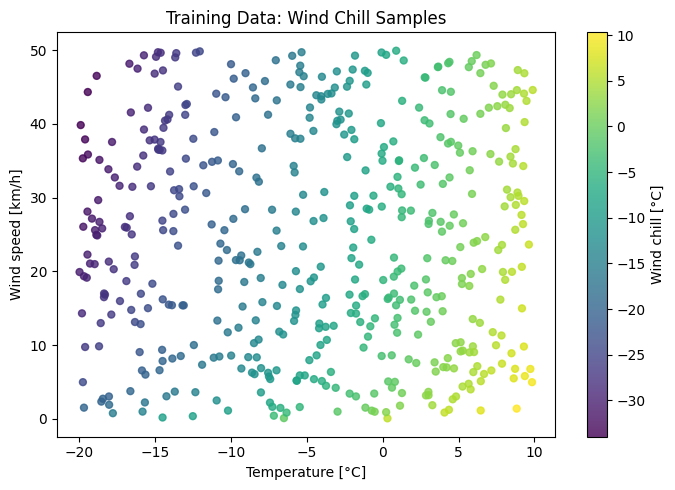

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Extract numpy arrays (for clarity)
tt_np = tt
ff_np = ff
wc_np = wc

# ------------------------------------------------------------
# Scatter plot of training samples
# ------------------------------------------------------------
plt.figure(figsize=(7, 5))

sc = plt.scatter(
    tt_np,
    ff_np,
    c=wc_np,
    s=25,
    cmap="viridis",
    alpha=0.8
)

plt.colorbar(sc, label="Wind chill [°C]")

plt.xlabel("Temperature [°C]")
plt.ylabel("Wind speed [km/h]")
plt.title("Training Data: Wind Chill Samples")

plt.tight_layout()
plt.savefig("windchill_training_data.png", dpi=150)
plt.show()

Epoch [500/10000], Loss: 0.8233, val_loss: 0.8064
Epoch [1000/10000], Loss: 0.5409, val_loss: 0.5102
Epoch [1500/10000], Loss: 0.2548, val_loss: 0.2309
Epoch [2000/10000], Loss: 0.1637, val_loss: 0.1417
Epoch [2500/10000], Loss: 0.1341, val_loss: 0.1182
Epoch [3000/10000], Loss: 0.1226, val_loss: 0.1106
Epoch [3500/10000], Loss: 0.1123, val_loss: 0.1023
Epoch [4000/10000], Loss: 0.0981, val_loss: 0.0883
Epoch [4500/10000], Loss: 0.0890, val_loss: 0.0804
Epoch [5000/10000], Loss: 0.0737, val_loss: 0.0672
Epoch [5500/10000], Loss: 0.0611, val_loss: 0.0513
Epoch [6000/10000], Loss: 0.0456, val_loss: 0.0382
Epoch [6500/10000], Loss: 0.0210, val_loss: 0.0241
Epoch [7000/10000], Loss: 0.0126, val_loss: 0.0183
Epoch [7500/10000], Loss: 0.0104, val_loss: 0.0177
Epoch [8000/10000], Loss: 0.0090, val_loss: 0.0160
Epoch [8500/10000], Loss: 0.0078, val_loss: 0.0142
Epoch [9000/10000], Loss: 0.0071, val_loss: 0.0134
Epoch [9500/10000], Loss: 0.0070, val_loss: 0.0135
Epoch [10000/10000], Loss: 0.005

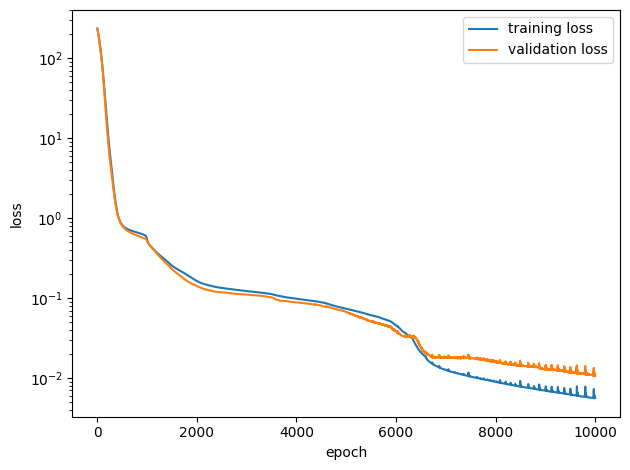

In [6]:

##########
# Step 2: Build a Neural Network Model with Hidden Layers
class wind_chill_model(nn.Module):
    def __init__(self, hidden_dim):
        super(wind_chill_model, self).__init__()
        self.fc1 = nn.Linear(2, hidden_dim)  # First hidden layer
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # Second hidden layer
        self.fc3 = nn.Linear(hidden_dim, 1)  # Output layer
        self.relu = nn.ReLU()  # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply ReLU after the first hidden layer
        x = self.relu(self.fc2(x))  # Apply ReLU after the second hidden layer
        x = self.fc3(x)  # Output layer (no activation for regression)
        return x

hidden_dim = 20
model = wind_chill_model(hidden_dim=hidden_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)


#########
# Create a validation data set
n_vsamples=100

vtt = np.random.uniform(-20, 10, n_vsamples)  # Temperature in Celsius
vff = np.random.uniform(0, 50, n_vsamples)  # Wind speed in km/h
vwc = 13.12 + 0.6215 * vtt - 11.37 * (vff ** 0.16) + 0.3965 * vtt * (vff ** 0.16)

x_val = torch.tensor(np.column_stack((vtt, vff)), dtype=torch.float32)
y_val = torch.tensor(vwc, dtype=torch.float32).view(-1, 1)


##########
# Training loop
train_loss = []  # Initialize loss list
validation_loss = [] # validation loss
n_epoch = 10000  # Set number of epochs

from datetime import datetime

with mlflow.start_run(run_name="WindChill NN") as run:
  # Log the hyperparameters
  mlflow.log_params({
    "hidden_dim": hidden_dim,
  })
  run_id = run.info.run_id
  mlflow.log_artifact("windchill_surface.png")

  for epoch in range(n_epoch):
    model.train()  # Set model to train mode
    optimizer.zero_grad()  # Clear gradients
    y_pred = model(x_train)  # Forward pass
    loss = criterion(y_pred, y_train)  # Compute loss
    loss.backward()  # Backpropagate error
    optimizer.step()  # Update weights

    train_loss.append(loss.item())  # Save loss

    y_pred=model(x_val) # predict on validateion dataset
    vloss=criterion(y_pred,y_val)
    validation_loss.append(vloss.item())

    # Print losses every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{n_epoch}], Loss: {loss.item():.4f}, val_loss: {vloss.item():.4f}')

        # Log the losses metrics
        mlflow.log_metric("loss", loss.item(), step=(epoch+1)*x_train.shape[0])
        mlflow.log_metric("val_loss", vloss.item(), step=(epoch+1)*x_train.shape[0])

###########
# Loss curve
  plt.plot(np.arange(n_epoch),train_loss,label="training loss")
  plt.plot(np.arange(n_epoch),validation_loss,label="validation loss")
  plt.yscale('log')
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.legend()
  plt.tight_layout()
  plt.savefig("windchill_loss.png")
  mlflow.log_figure(plt.gcf(), "windchill_loss.png")

mlflow.end_run()

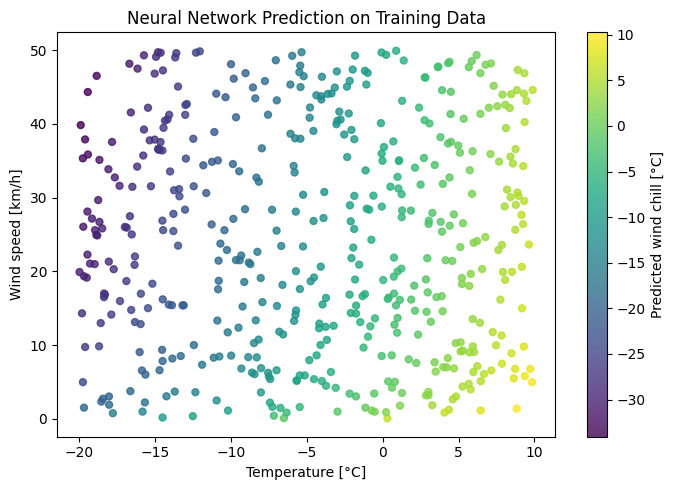

In [7]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# ------------------------------------------------------------
# Run the trained model on the training inputs
# ------------------------------------------------------------
model.eval()
with torch.no_grad():
    wc_pred = model(x_train).cpu().numpy().squeeze()

# ------------------------------------------------------------
# Scatter plot: inputs colored by network prediction
# ------------------------------------------------------------
plt.figure(figsize=(7, 5))

sc = plt.scatter(
    tt,                    # temperature
    ff,                    # wind speed
    c=wc_pred,             # predicted wind chill
    s=25,
    cmap="viridis",
    alpha=0.8
)

plt.colorbar(sc, label="Predicted wind chill [°C]")

plt.xlabel("Temperature [°C]")
plt.ylabel("Wind speed [km/h]")
plt.title("Neural Network Prediction on Training Data")

plt.tight_layout()
plt.savefig("windchill_prediction_training.png", dpi=150)
plt.show()

mlflow.start_run(run_id=run_id)
mlflow.log_artifact("windchill_training_data.png")
mlflow.log_artifact("windchill_prediction_training.png")
mlflow.end_run()


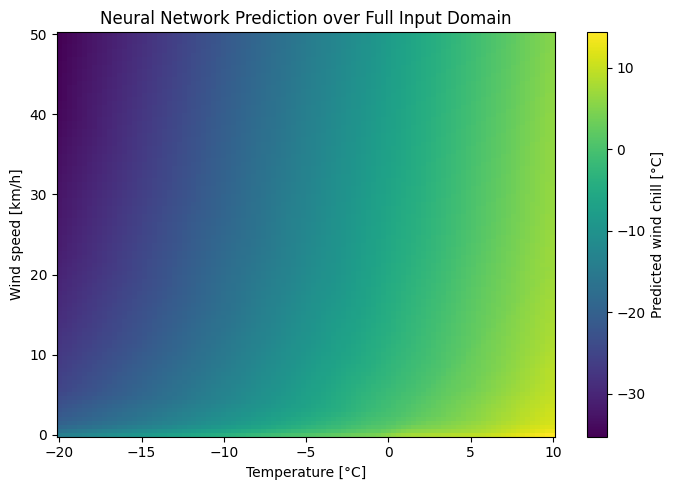

In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Create a dense input grid over the full domain
# ------------------------------------------------------------
tt_grid = np.linspace(-20, 10, 100)   # temperature [°C]
ff_grid = np.linspace(0, 50, 100)     # wind speed [km/h]
TT, FF = np.meshgrid(tt_grid, ff_grid)

# Stack grid into model input
x_grid = torch.tensor(
    np.column_stack((TT.ravel(), FF.ravel())),
    dtype=torch.float32
)

# ------------------------------------------------------------
# Model prediction on the full grid
# ------------------------------------------------------------
model.eval()
with torch.no_grad():
    wc_pred_grid = model(x_grid).cpu().numpy().reshape(TT.shape)

# ------------------------------------------------------------
# Plot learned surface
# ------------------------------------------------------------
plt.figure(figsize=(7, 5))

pcm = plt.pcolormesh(
    TT, FF, wc_pred_grid,
    shading="auto",
    cmap="viridis"
)
plt.colorbar(pcm, label="Predicted wind chill [°C]")

plt.xlabel("Temperature [°C]")
plt.ylabel("Wind speed [km/h]")
plt.title("Neural Network Prediction over Full Input Domain")

plt.tight_layout()
plt.savefig("windchill_prediction_surface.png", dpi=150)
plt.show()

mlflow.start_run(run_id=run_id)
mlflow.log_artifact("windchill_prediction_surface.png")
mlflow.end_run()

In [9]:
from mlflow.models import infer_signature

model.eval()
with torch.no_grad():
    y_pred = model(x_val).cpu().numpy()
    signature = infer_signature(x_val.cpu().numpy(), y_pred)

mlflow.start_run(run_id=run_id)
mlflow.pytorch.log_model(
    model,
    name="model",                 # ← new argument
    signature=signature,
    input_example=x_val[:5].cpu().numpy()
)
mlflow.end_run()